<div>
<b>Никита, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Оглавление
1. [Изучение данных из файла](#start)
2. [Предобработка данных](#preprocessing)
    1. [Вывод](#conclusion1)
3. [Анализ данных](#data_analysis)
    1. [Вывод](#conclusion2)
4. [Проверка гипотез](#hypothesis_testing)
    1. [Вывод](#conclusion3)
5. [Общий вывод](#conclusion) 

# Описание данных

**1. Количественные (числовые):**

    1. Непрерывные
        1. reg_date — дата подключения тарифа (день, месяц, год)
        2. churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
        3. call_date — дата звонка
        4. message_date — дата сообщения
        5. session_date — дата интернет-сессии
    2. Дискретные
        1. age — возраст пользователя (годы)
        2. duration — длительность звонка в минутах
        3. mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
        4. rub_per_message — стоимость отправки сообщения сверх тарифного пакета
        5. rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
        6. rub_monthly_fee — ежемесячная абонентская плата в рублях
        7. minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
        8. messages_included — количество сообщений в месяц, включённых в абонентскую плату
        9. mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
        10. rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
        
**2. Категориальные (качественные):**
* user_id — уникальный идентификатор пользователя, отправившего сообщение, сделавшего звонок
* first_name — имя пользователя
* last_name — фамилия пользователя
* city — город проживания пользователя
* tariff — название тарифного плана
* id — уникальный номер звонка, сообщения
* tariff_name — название тарифа



**3. Логические (булевы):**
**Отсутсвуют!**





# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

## Изучение данных из файла
<a id="start"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # для нормального отображение вещественных чисел

In [3]:
try:
    df_calls = pd.read_csv('/datasets/calls.csv')
    df_internet = pd.read_csv('/datasets/internet.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
    df_users = pd.read_csv('/datasets/users.csv')
except:
    df_calls = pd.read_csv('/Users/nikitagudilin/Desktop/YANDEX_PRAKTIKUM/PROJECTS/M1/project3/calls.csv')
    df_internet = pd.read_csv('/Users/nikitagudilin/Desktop/YANDEX_PRAKTIKUM/PROJECTS/M1/project3/internet.csv')
    df_messages = pd.read_csv('/Users/nikitagudilin/Desktop/YANDEX_PRAKTIKUM/PROJECTS/M1/project3/messages.csv')
    df_tariffs = pd.read_csv('/Users/nikitagudilin/Desktop/YANDEX_PRAKTIKUM/PROJECTS/M1/project3/tariffs.csv')
    df_users = pd.read_csv('/Users/nikitagudilin/Desktop/YANDEX_PRAKTIKUM/PROJECTS/M1/project3/users.csv')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный и безопасный способ избежать ошибки подкючения наших данных 👍

</div>

Посмотрим на таблицу с тарифами

In [4]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Посмотрим на таблицы с информацией о звонках,сообщениях, интернет-сессиях 

In [5]:
df_calls.sample(10)

,id,call_date,duration,user_id
114914,1294_254,2018-09-25,15.140,1294
10691,1027_561,2018-04-25,9.040,1027
50005,1124_224,2018-11-21,12.090,1124
78972,1196_1204,2018-10-26,0.360,1196
53020,1134_81,2018-06-29,9.770,1134
42090,1103_48,2018-12-22,7.850,1103
49446,1123_465,2018-07-10,9.530,1123
4751,1012_225,2018-12-13,6.320,1012
177547,1439_94,2018-12-08,4.330,1439
166791,1411_206,2018-09-20,13.850,1411


In [6]:
df_internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
45735,45735,1157_247,125.100,2018-04-18,1157
30432,30432,1106_234,0.000,2018-07-13,1106
29018,29018,1101_124,53.230,2018-12-17,1101
34635,34635,1120_207,967.030,2018-11-10,1120
52615,52615,1177_138,430.950,2018-10-10,1177
23601,23601,1079_204,0.000,2018-08-13,1079
47757,47757,1164_326,0.000,2018-10-19,1164
106400,106400,1360_20,505.450,2018-04-27,1360
78057,78057,1263_128,377.830,2018-11-29,1263
107765,107765,1366_120,123.620,2018-12-24,1366


In [7]:
df_messages.sample(10)

,id,message_date,user_id
111489,1451_68,2018-10-03,1451
57958,1256_42,2018-10-19,1256
19123,1083_312,2018-09-04,1083
84306,1353_143,2018-06-15,1353
30541,1134_259,2018-11-21,1134
84082,1351_11,2018-12-23,1351
64709,1277_1386,2018-09-22,1277
116653,1474_39,2018-12-05,1474
75068,1318_97,2018-09-17,1318
89099,1373_111,2018-10-11,1373


Посмотрим на таблицу с информацией о пользователях

In [8]:
df_users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
11,1011,44,NaN,Самара,Веселина,Алёшко,2018-03-19,smart
351,1351,39,NaN,Казань,Анфиса,Вешнякова,2018-11-16,smart
359,1359,52,NaN,Москва,Константин,Абашкин,2018-07-27,smart
420,1420,53,NaN,Сочи,Анатолий,Корольков,2018-09-19,smart
302,1302,43,NaN,Уфа,Владислав,Абаимов,2018-01-23,smart
137,1137,64,NaN,Кемерово,Ким,Артёшин,2018-12-02,smart
460,1460,64,NaN,Ижевск,Арина,Абашкина,2018-04-06,smart
216,1216,74,NaN,Волгоград,Рустам,Малинин,2018-11-23,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
57,1057,43,NaN,Москва,Динара,Дьячкова,2018-03-12,ultra


Получим информацию о таблицах

In [9]:
lst_df = [df_calls, df_internet, df_messages, df_tariffs, df_users]
for obj in lst_df:
    obj.info()
    print('-'*40) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: in

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что используем цикл `for` для первичного просмотра наших данных.
    
</div>

1. В df_calls нужно изменить тип данных в call_date на дату, а также округлить длительность разговора (duration) в большую сторону для более удобного подсчета и изменения типа данных, поскольку «Мегалайн» всегда округляет вверх значения минут и мегабайтов
2. В df_internet удалить неизвестынй столбец Unnamed: 0, округлить объём потраченного за сессию интернет-трафика (mb_used) в большую сторону для более удобного подсчета и изменения типа данных, нужно изменить тип данных в session_date на дату 
3. В df_messages нужно изменить тип данных в message_date на дату 
4. В df_users нужно изменить тип данных в churn_date на дату  

Проанализируем стат.данные

In [10]:
df_calls.describe()

,duration,user_id
count,202607.000,202607.000
mean,6.756,1253.941
std,5.843,144.723
min,0.000,1000.000
25%,1.300,1126.000
50%,6.000,1260.000
75%,10.700,1379.000
max,38.000,1499.000


In [11]:
df_internet.describe() 

,Unnamed: 0,mb_used,user_id
count,149396.000,149396.000,149396.000
mean,74697.500,370.192,1252.100
std,43127.055,278.301,144.051
min,0.000,0.000,1000.000
25%,37348.750,138.188,1130.000
50%,74697.500,348.015,1251.000
75%,112046.250,559.553,1380.000
max,149395.000,1724.830,1499.000


In [12]:
df_users.describe()

,user_id,age
count,500.000,500.000
mean,1249.500,46.588
std,144.482,16.668
min,1000.000,18.000
25%,1124.750,32.000
50%,1249.500,46.000
75%,1374.250,62.000
max,1499.000,75.000


В большинстве случаев mean приблизительно равен median, что говорит об незначительных выбросах 

Узнаем, присутсвуют ли дублированные записи

In [13]:
df_calls.duplicated().sum()

0

In [14]:
df_internet.duplicated().sum()

0

In [15]:
df_messages.duplicated().sum()

0

In [16]:
df_users.duplicated().sum()

0

Узнаем, присутсвуют ли пропущенные записи

In [17]:
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [18]:
df_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [19]:
df_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [20]:
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Пропущены значения только в churn_date, как уточнялось, если значение пропущено, то тариф ещё действовал на момент выгрузки данных

Построим диаграмму размаха для понимания расположения данных и для ознакомления с выбросами

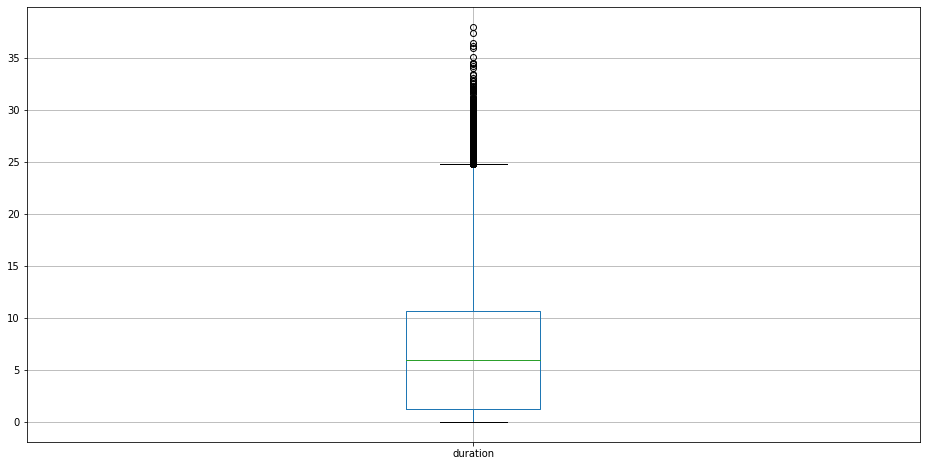

In [21]:
df_calls.boxplot('duration', figsize=(16, 8))

Здесь датасет немного скошен влево, и заметны выбросы

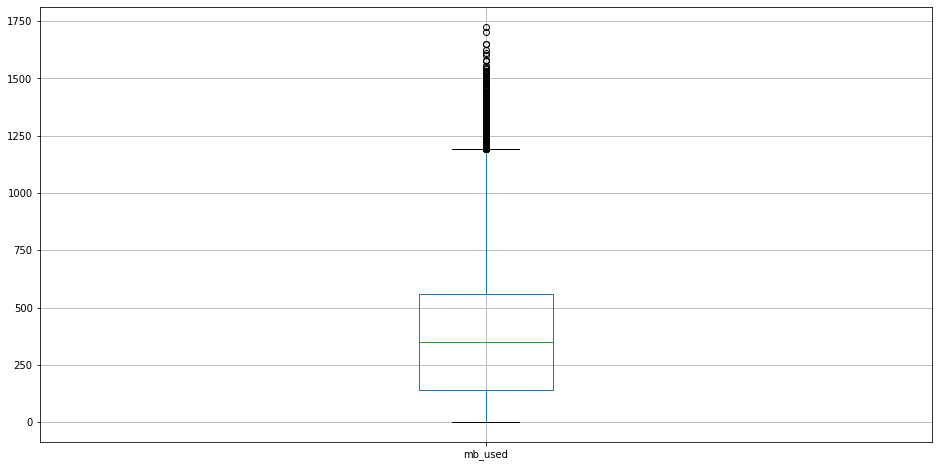

In [22]:
df_internet.boxplot('mb_used', figsize=(16, 8))

Здесь аналогичная ситуация

Для других построить boxplot нельзя

Теперь построим гистограммы для определения границ и обозначим mean и median для наглядности

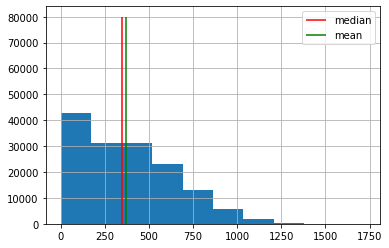

In [23]:
df_internet['mb_used'].hist()
plt.vlines(x=df_internet['mb_used'].median(), ymin=0, ymax=80000, label='median', colors='red')
plt.vlines(x=df_internet['mb_used'].mean(), ymin=0, ymax=80000, label='mean', colors='green')
plt.legend() 

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Не забывай пожалуйста подписывать каждый график.
    
Это важный момент всего проекта, так быстрее понять о чем идёт речь на графике.
    
</div>

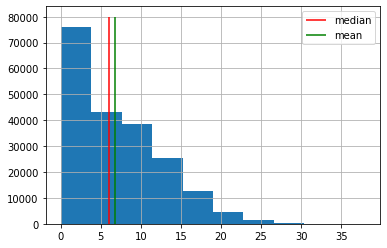

In [24]:
df_calls['duration'].hist()
plt.vlines(x=df_calls['duration'].median(), ymin=0, ymax=80000, label='median', colors='red')
plt.vlines(x=df_calls['duration'].mean(), ymin=0, ymax=80000, label='mean', colors='green')
plt.legend() 

Перед слиянием в один df необходимо сгруппировать фреймы и подсчитать необходимую информацию, что будет сделано в следующем этапе

###  Вывод
<a id="conclusion1"></a>
1. Перед слиянием в один df необходимо сгруппировать фреймы и подсчитать необходимую информацию.
2. Нужно изменить тип данных в df_calls в call_date, в df_messages в message_date, в df_users в churn_date и в df_internet в session_date на дату.
3. В df_internet удалить неизвестный столбец Unnamed: 0.
4. Округлить объём потраченного за сессию интернет-трафика (mb_used), длительность разговора (duration) в большую сторону для более удобного подсчета и изменения типа данных.
5. Заполнить пропуски в churn_date
6. Отсутсвуют дублированные записи в таблицах, а также пропущенные во всех кроме df_users.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально изучили наши первичные данные, давай теперь их обработаем. 
    
В том числе можно было бы сделать функцию для проверки наших первичных данных: 
    
- info
- head
- describe
- и так далее 
    
</div>

## Предобработка данных
<a id="preprocessing"></a> 

Исправим возникшие ошибки и Посчитаем для каждого пользователя:

    1. количество сделанных звонков и израсходованных минут разговора по месяцам;
    2. количество отправленных сообщений по месяцам;
    3. объем израсходованного интернет-трафика по месяцам;
    4. помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Как сообщалось в задании - длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Нужно решить, обрабатывать ли эти нулевые значения, как их отсутствие повлияет на результаты анализа.

In [25]:
len(df_calls.query('duration == 0')) / len(df_calls['duration']) * 100

19.551644316336553

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный способ посчитать необходимую долю значений.

</div>

19.5% данных это достаточно много, эти значения удалять нельзя, оставим их и заменим на 1, поскольку звонок нулевой длины, это по факту состоявшееся соединение, которое тут же прервалось и платят за него, как за одну минуту разговора.

In [26]:
df_calls.loc[df_calls['duration'] == 0, 'duration'] = 1

1. Изменим тип данных на Date

In [27]:
date_format = '%Y-%m-%d'
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format=date_format)
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format=date_format)
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format=date_format)
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format=date_format)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format=date_format)

2. В df_internet удалим неизвестный столбец Unnamed: 0.

In [28]:
try:
    df_internet = df_internet.drop('Unnamed: 0', 1)
except:
    print('Уже удален')

3. Сгруппируем данные

Перед этим добавим новый столбец с месяцами для расчетов

In [29]:
df_internet['month'] = df_internet['session_date'].dt.month
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Лучше всего использовать месяцы в формате дат, например `yyyy-mm-dd` (2020-01-01), потому что в наших данных может быть несколько временных периодов и эти периоды будут тогда помещены в одну группу, при методе выше.
    
</div>

Посчитаем объем израсходованного интернет-трафика по месяцам

In [30]:
df_i_gr = df_internet.pivot_table(index=['user_id','month'], 
                                  values='mb_used', aggfunc=['sum']).reset_index()
df_i_gr.columns = [item[0] for item in df_i_gr.columns]
df_i_gr.columns = ['user_id', 'month', 'mb_used']
df_i_gr.sample(10)

,user_id,month,mb_used
1512,1239,7,14104.530
1845,1292,5,28731.290
2311,1368,12,20475.850
3035,1473,9,17289.850
647,1101,12,8335.670
795,1123,10,18245.450
2824,1439,8,22740.500
2731,1427,4,13259.690
848,1134,4,17249.410
2629,1411,11,16051.490


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

С группировкой данных разобрались, супер.
    
Этот инструмент мы будем использовать достаточно часто в нашей практике.
    
</div>

Переведем mb в gb для округления 

In [31]:
df_i_gr['gb_used'] = df_i_gr['mb_used'] / 1024
try:
    df_i_gr = df_i_gr.drop('mb_used', 1)
except:
    print('Уже удален')

In [32]:
df_i_gr.sample(10)

,user_id,month,gb_used
1222,1189,5,18.025
2528,1395,8,16.416
488,1078,7,21.907
64,1009,4,14.364
625,1099,4,10.639
2231,1355,9,15.593
2019,1320,10,13.063
3033,1472,12,18.518
723,1113,11,14.034
176,1027,6,14.331


In [33]:
df_i_gr.isna().sum()

user_id    0
month      0
gb_used    0
dtype: int64

Посчитаем количество израсходованных минут разговора по месяцам

In [34]:
df_c_gr = df_calls.pivot_table(index=['user_id','month'], 
                                  values='duration', aggfunc=['sum']).reset_index()
df_c_gr.columns = [item[0] for item in df_c_gr.columns]
df_c_gr.columns = ['user_id', 'month', 'duration']
df_c_gr.sample(10)

,user_id,month,duration
247,1039,10,555.850
2148,1342,12,592.400
2617,1412,11,627.520
3139,1493,11,169.770
1318,1208,11,543.770
2665,1421,3,273.600
2317,1372,12,493.930
2652,1418,11,397.480
1196,1188,8,34.580
1463,1233,9,640.630


Посчитаем количество сделанных звонков по месяцам;

In [35]:
df_c_gr1 = df_calls.pivot_table(index=['user_id','month'], 
                                  values='id', aggfunc=['count']).reset_index()
df_c_gr1.columns = [item[0] for item in df_c_gr1.columns]
df_c_gr1.columns = ['user_id', 'month', 'calls']

In [36]:
df_c_gr.isna().sum()

user_id     0
month       0
duration    0
dtype: int64

In [37]:
df_c_gr1.isna().sum()

user_id    0
month      0
calls      0
dtype: int64

Посчитаем количество отправленных сообщений по месяцам;

In [38]:
df_m_gr = df_messages.pivot_table(index=['user_id','month'], 
                                  values='id', aggfunc=['count']).reset_index()
df_m_gr.columns = [item[0] for item in df_m_gr.columns]
df_m_gr.columns = ['user_id', 'month', 'messages']
df_m_gr.sample(10)

,user_id,month,messages
1852,1353,9,50
2155,1402,8,36
261,1050,6,25
233,1044,10,16
1888,1358,12,57
2440,1453,7,74
163,1030,7,101
791,1148,12,12
1844,1352,10,6
2583,1476,9,5


In [39]:
df_m_gr.isna().sum()

user_id     0
month       0
messages    0
dtype: int64

Cоединим таблицы с how=outer для сохранения всей информации

In [40]:
df = df_c_gr.merge(df_m_gr, on=['user_id', 'month'], how='outer')
df = df.merge(df_i_gr, on=['user_id', 'month'], how='outer')
df = df.merge(df_c_gr1, on=['user_id', 'month'], how='outer')
df = df.merge(df_users, on=['user_id'], how='outer')
df.sample(10)

,user_id,month,duration,messages,gb_used,calls,age,churn_date,city,first_name,last_name,reg_date,tariff
2108,1337,7.000,104.020,8.000,15.502,20.000,42,NaT,Вологда,Олег,Суслов,2018-01-15,smart
2373,1378,4.000,554.100,17.000,10.570,80.000,21,NaT,Иркутск,Евгения,Бычкова,2018-01-19,smart
545,1086,12.000,493.000,29.000,19.552,68.000,73,NaT,Волгоград,Ириней,Аксёнов,2018-04-26,smart
118,1016,12.000,93.790,103.000,18.973,16.000,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra
1353,1215,8.000,210.780,10.000,7.362,29.000,55,NaT,Рязань,Руслан,Алиев,2018-08-12,smart
3049,1478,7.000,167.300,31.000,10.653,20.000,75,NaT,Грозный,Таира,Константинова,2018-07-16,smart
1636,1263,7.000,636.520,6.000,14.835,95.000,32,NaT,Балашиха,Ермолай,Зайцев,2018-04-30,smart
870,1142,8.000,347.480,43.000,19.391,59.000,51,NaT,Новосибирск,Симона,Алешкова,2018-03-24,smart
1329,1210,9.000,662.260,nan,18.379,86.000,33,NaT,Севастополь,Евфросинья,Серебрякова,2018-07-29,smart
2326,1373,10.000,23.540,55.000,18.104,5.000,34,NaT,Улан-Удэ,Нелли,Афанасенко,2018-01-17,smart


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В целом таблицы мы соединили верно.
    
Однако при их соединении мы всё таки потеряли 2–х клиентов. В данный момент для нас это не критично, но в боевой задаче мы не захотим тепять эти данные.
    
Но было бы здорово понять куда они делись.
    
</div>

In [41]:
df.user_id.nunique()

500

In [42]:
df.isna().sum()

user_id          0
month            2
duration        42
messages       499
gb_used         13
calls           42
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [43]:
df.query('messages.isna() and calls.isna() and gb_used.isna()') #Посмотрим на такие строки

,user_id,month,duration,messages,gb_used,calls,age,churn_date,city,first_name,last_name,reg_date,tariff
3214,1128,nan,nan,nan,nan,nan,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,nan,nan,nan,nan,nan,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати если мы используем множественную фильтрацию, то лучше применять метод  `loc`, т.к. он выглядит читабельнее и работает быстрее.
    
</div>

In [44]:
len(df.query('duration.isna() and calls.isna()')) # Пропущены в одном ли месте?

42

* Удалим строки, где пропущены месяцы, т.к. этот параметр важен для анализа 
* duration и calls заполним 0 (пропущены в одном месте), поскольку выше была описана другая сиутация возникновения нулей (потом заменили на 1), а в этом случае звонков просто не было (длительность = 0 что логично)
* gb_used и messages также заполним 0 

In [45]:
df.dropna(subset=['month'], inplace=True)

In [46]:
df['calls'] = df['calls'].fillna(0)
df['duration'] = df['duration'].fillna(0)
df['gb_used'] = df['gb_used'].fillna(0)
df['messages'] = df['messages'].fillna(0)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

4. Теперь округлим значения вверх

In [47]:
df['duration'] = df['duration'].apply(np.ceil)
df['gb_used'] = df['gb_used'].apply(np.ceil)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что учитываем условия работы оператора связи и применяем метод `np.ceil`
    
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Однако метод `np.ceil` лучше применять ко всему столбцу целиком, так вычисления будут работать быстрее.  
    
Вот неплохая статья по скоростям вычисления в различных способах.
    
https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6
    
</div>

5. Приведем типы данных

In [48]:
df['gb_used'] = df['gb_used'].astype(int)
df['messages'] = df['messages'].astype(int)
df['duration'] = df['duration'].astype(int)
df['calls'] = df['calls'].astype(int)
df['month'] = df['month'].astype(int)

Посчитаем помесячную выручку с каждого пользователя

In [49]:
def users_gain(row):
    if row['tariff'] == 'smart':
        sum_m = 50 - row['messages'] 
        sum_i = 15 - row['gb_used'] 
        sum_c = 500 - row['duration'] 
        if sum_m < 0:
            sum_m = abs(sum_m) * 3
        elif sum_m > 0:
            sum_m = 0
        if sum_i < 0:
            sum_i = abs(sum_i) * 200
        elif sum_i > 0:
            sum_i = 0
        if sum_c < 0:
            sum_c = abs(sum_c) * 3
        elif sum_c > 0:
            sum_c = 0
        main_sum = sum_m + sum_i + sum_c + 550
        return main_sum
    elif row['tariff'] == 'ultra':
        sum_m = 1000 - row['messages'] 
        sum_i = 30 - row['gb_used'] 
        sum_c = 3000 - row['duration'] 
        if sum_m < 0:
            sum_m = abs(sum_m) * 1
        elif sum_m > 0:
            sum_m = 0
        if sum_i < 0:
            sum_i = abs(sum_i) * 150
        elif sum_i > 0:
            sum_i = 0
        if sum_c < 0:
            sum_c = abs(sum_c) * 1
        elif sum_c > 0:
            sum_c = 0
        main_sum = sum_m + sum_i + sum_c + 1950
        return main_sum

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно было бы присоединить таблицу с показателями по тарифам к нашим расчетам и осуществлять нужные вычисления по столбцам.
    
Таким образом мы значительно бы ускорили наш расчет.
    
</div>

In [50]:
df['gain'] = df.apply(users_gain, axis=1)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выручка посчитана верно, теперь любая фин.отчетность нам не помеха 😊
    

    
</div>

In [51]:
df['gain'].describe()

count   3214.000
mean    1516.812
std      795.275
min      550.000
25%      750.000
50%     1610.500
75%     1950.000
max     6668.000
Name: gain, dtype: float64

In [52]:
df.sample(10)

,user_id,month,duration,messages,gb_used,calls,age,churn_date,city,first_name,last_name,reg_date,tariff,gain
2955,1465,7,650,57,16,89,41,NaT,Омск,Пётр,Ёркин,2018-04-14,smart,1221
2460,1390,9,190,40,19,25,56,NaT,Санкт-Петербург,Лидия,Беляева,2018-07-30,smart,1350
442,1068,12,508,29,16,77,34,NaT,Москва,Ким,Демьянов,2018-07-16,smart,774
2046,1326,11,361,25,20,45,37,NaT,Санкт-Петербург,Леонид,Барсуков,2018-05-29,smart,1550
3113,1487,12,147,20,12,30,72,NaT,Кострома,Рудольф,Кириллов,2018-08-13,smart,550
2408,1382,4,668,80,11,87,42,NaT,Самара,Оксана,Нестерова,2018-03-26,ultra,1950
1718,1275,9,356,22,12,54,48,NaT,Москва,Семён,Елизаров,2018-04-24,smart,550
1010,1161,10,300,34,21,43,65,2018-11-07,Набережные Челны,Татьяна,Голованова,2018-07-03,smart,1750
1411,1224,11,415,0,21,70,58,NaT,Магнитогорск,Ахмет,Тарасов,2018-04-24,smart,1750
415,1065,7,434,69,21,65,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart,1807


### Вывод

1. Изменили тип данных на Date
2. Привели все к единому датафрейму
3. Округлили значения вверх в минутах разговора и гб трафика
4. Удалили неизвестный столбец Unnamed: 0.
5. Заполнили пропуски 
6. Привели столбцы с float к int
7. Провели расчеты

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Что ж, данные мы подготовили, теперь можем их проанализировать.
    
</div>

## Анализ данных
<a id="data_analysis"></a>

Опишем поведение клиентов оператора, исходя из выборки. Ответим на вопросы: 
1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
2. Посчитаем среднее количество, дисперсию и стандартное отклонение. 
3. Построим гистограммы. Опишем распределения.

In [53]:
df1 = df.query('tariff == "smart"')
df1[['messages', 'gb_used', 'duration']].describe()

,messages,gb_used,duration
count,2229.000,2229.000,2229.000
mean,33.384,16.329,406.438
std,28.228,5.747,184.531
min,0.000,0.000,0.000
25%,10.000,13.000,275.000
50%,28.000,17.000,411.000
75%,51.000,20.000,530.000
max,143.000,38.000,1391.000


In [54]:
df2 = df.query('tariff == "ultra"')
df2[['messages', 'gb_used', 'duration']].describe()

,messages,gb_used,duration
count,985.000,985.000,985.000
mean,49.363,19.494,511.704
std,47.804,9.854,308.057
min,0.000,0.000,0.000
25%,6.000,12.000,277.000
50%,38.000,19.000,503.000
75%,79.000,27.000,731.000
max,224.000,49.000,1633.000


Вычислим несмещенную оценку для дисперсий

In [55]:
disp_1 = {'messages': np.var(df1['messages'], ddof=1),
         'gb_used': np.var(df1['gb_used'], ddof=1),
         'duration': np.var(df1['duration'], ddof=1),
         }
disp_2 = {'messages': np.var(df2['messages'], ddof=1),
         'gb_used': np.var(df2['gb_used'], ddof=1),
         'duration': np.var(df2['duration'], ddof=1),
         }

In [56]:
disp_1, disp_2

({'messages': 796.8129584480083,
  'gb_used': 33.02870517811161,
  'duration': 34051.57844167748},
 {'messages': 2285.2661425446736,
  'gb_used': 97.09168626965459,
  'duration': 94898.83885931245})

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати весь этот расчет можно было сделать с помощью сводной таблицы.
    
Где в атрибуте `aggfunc` мы укажем нужные нам метрики – `aggfunc = [np.var, np.std,]` и т.д.
    
</div>

Вычислим несмещенную оценку для стандартных отклонений

In [57]:
std_1 = {'messages': np.std(df1['messages'], ddof=1),
         'gb_used': np.std(df1['gb_used'], ddof=1),
         'duration': np.std(df1['duration'], ddof=1),
         }
std_2 = {'messages': np.std(df2['messages'], ddof=1),
         'gb_used': np.std(df2['gb_used'], ddof=1),
         'duration': np.std(df2['duration'], ddof=1),
         }

In [58]:
std_1, std_2

({'messages': 28.22787555676141,
  'gb_used': 5.7470605685090534,
  'duration': 184.5306978301374},
 {'messages': 47.804457350174715,
  'gb_used': 9.853511367510293,
  'duration': 308.0565513981361})

Построим гистограммы

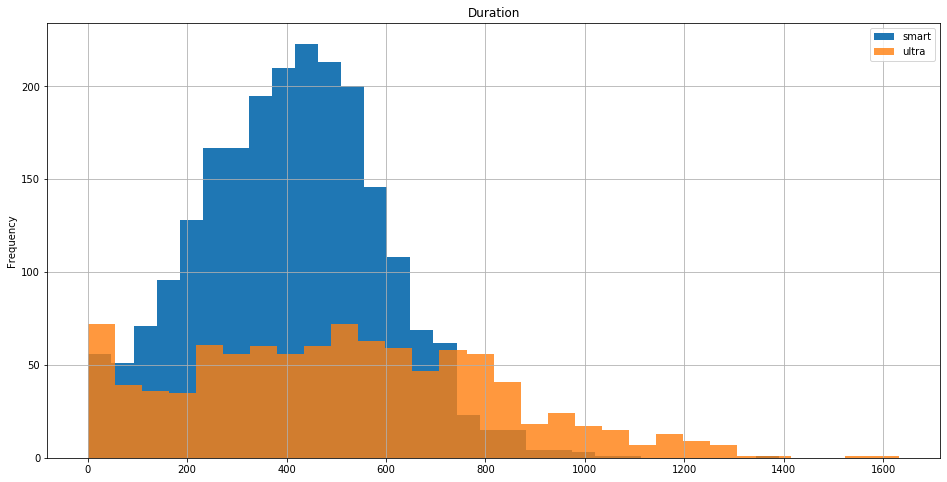

In [59]:
df1['duration'].plot(kind='hist', bins=30, figsize=(16,8), label='smart')
df2['duration'].plot(kind='hist', bins=30, grid=True, alpha=0.8, label='ultra')
plt.title("Duration")
plt.legend()

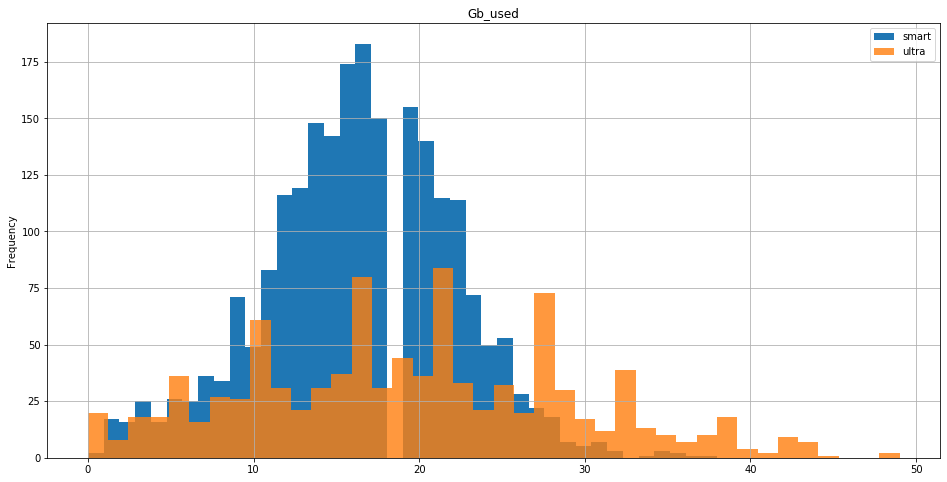

In [60]:
df1['gb_used'].plot(kind='hist', bins=40, figsize=(16,8), label='smart')
df2['gb_used'].plot(kind='hist', bins=40, grid=True, alpha=0.8, label='ultra')
plt.title("Gb_used")
plt.legend()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши графики повторяются.
    
Это говорит о том, что мы можем создать функцию для оптимизации нашего кода. 
    
</div>

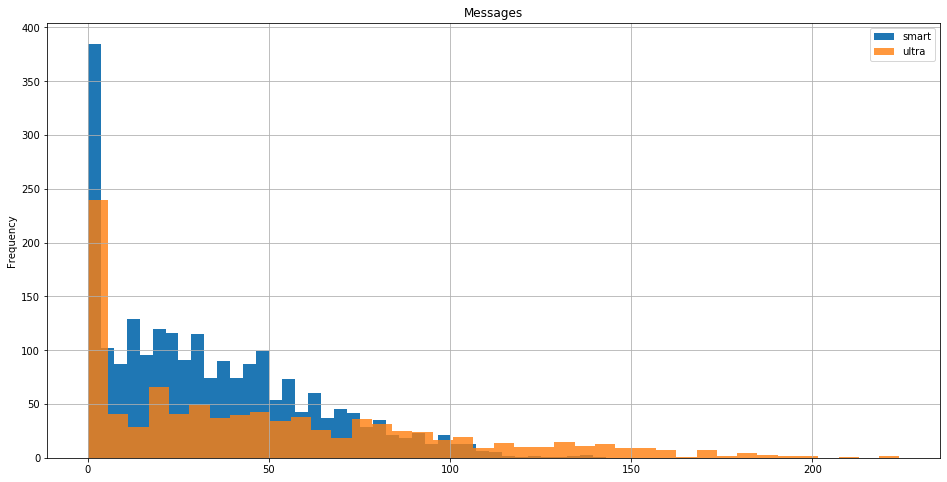

In [61]:
df1['messages'].plot(kind='hist', bins=40, figsize=(16,8), label='smart')
df2['messages'].plot(kind='hist', bins=40, grid=True, alpha=0.8, label='ultra')
plt.title("Messages")
plt.legend()

Первые 2 гистограммы демонстрируют нормальное распределение, а последняя Пуассоновское

### Вывод
<a id="conclusion2"></a>

1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? В среднем пользователям тарифа smart требуется 34 сообщения, 17гб и 407 минут (в тариф не укладывается интернет, следовательно, в среднем переплата у пользователей 400р из-за него), а ultra 50 сообщений 20гб интернета и 512 минут (полностью укладывается в тариф).
2. Посчитали среднее количество, дисперсию и стандартное отклонение. 
3. Построили гистограммы. Первые 2 гистограммы из каждого датафрейма демонстрируют нормальное распределение, а последняя Пуассоновское

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Очень детально проверили наш анализ пользователей, выводы абсолютно логичны и даже придраться не к чему 😊👍
    
Предлагаю приступить к проверке наших гипотез.
    
</div>

## Проверка гипотез
<a id="hypothesis_testing"></a>

In [62]:
alpha = 0.05 # критический уровень статистической значимости

Проверить гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

То есть необходимо проверить гипотезы о равенстве средних 2 генеральных совокупностей и они двусторонние

1. В первом случае:
    * H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна (т.к. H0 всегда формулируется так, чтобы использовать знак равенства), тогда 
    * H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. Во втором случае:
    * H0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;
    * H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
    
**Best practies:**
    
Перед проверкой гипотезы рекомендую проверить дисперсии выборок, чтобы корректно определить атрибут `equal_val` в Т–тесте.
    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
    
Так мы покажем логичность и последовательность наших действий.
    
</div>

In [63]:
results1 = st.ttest_ind(df1['gain'], df2['gain'], equal_var = False) #проверка о равенстве в 1 случае

In [64]:
results1.pvalue

5.99313021868359e-263

In [65]:
if (results1.pvalue < alpha) and (df1['gain'].mean() < df2['gain'].mean()):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Отвергаем нулевую гипотезу


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

В конструкции `if`можно писать условие без скобок. Для логики это неважно, но чем меньше символов в коде — тем легче его читать. Чтобы продемонстрировать коллегам хороший стиль кода, привыкай писать условия без скобок.
</div>


In [66]:
results2 = st.ttest_ind(df.query('city == "Москва"')['gain'], 
                       df.query('city != "Москва"')['gain'], equal_var = False) #проверка о равенстве во 2 случае

In [67]:
results2.pvalue

0.4995403987221443

In [68]:
if (results2.pvalue < alpha) and \
(df.query('city == "Москва"')['gain'].mean() < df.query('city != "Москва"')['gain'].mean()):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Не получилось отвергнуть нулевую гипотезу


### Вывод
<a id="conclusion3"></a>

В результате исследования в первом случае гипотеза H1 (средняя выручка пользователей тарифов «Ультра» и «Смарт» различается) не была отвергнута, а во втором случае H0 (средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов) также.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия также повторяются с точки зрения расчетов статистических тестов, это говорит о том, что мы можем также создать здесь функцию 😊
    
</div>

## Общий вывод
<a id="conclusion"></a>

В результате проделанной работы было выполнено:

1. Предобработали данные: 
    * Изменили тип данных на Date в df_calls в call_date, в df_messages в message_date, в df_users в churn_date и в df_internet в session_date 
    * Округлили значения вверх в минутах разговора и гб трафика
    * Удалили неизвестный столбец Unnamed: 0.
    * Заполнили пропуски
2. Привели все к единому датафрейму
3. Привели все столбцы с float к int
4. Провели расчеты для каждого пользователя с помощью сводных таблиц:
    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя.
5. Вычислили среднее, несмещенную оценку для дисперсий, стандартных отклонений
6. Построили гистограммы. Первые 2 гистограммы из каждого датафрейма демонстрируют нормальное распределение, а последняя Пуассоновское
7. Определили сколько в среднем пользователям тарифов требуется сообщений, минут и гб интернета
8. Отвергли гипотезу H0 (средняя выручка пользователей тарифов «Ультра» и «Смарт» равна) и H1 (средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
       
Рекомендую посмотреть в открытом доступе на ютубе например – курс по Алгоритмам и структурам данных, эта информация поможет нам в дальнейшем при работе с данными.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
 
    
</div>